<a href="https://colab.research.google.com/github/hBar2013/DS-Unit-2-Classification-1/blob/master/module4-confusion-matrix/kim_lowry_classification_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.5MB/s 


In [7]:
from google.colab import files
uploaded = files.upload()

Saving train_labels.csv to train_labels.csv


In [0]:
%matplotlib inline
import category_encoders as ce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels



In [0]:
train_features_file = 'train_features.csv'
train_labels_file = 'train_labels.csv'
test_features_file = 'test_features.csv'
sumbission_sample_file = 'sample_submission.csv'

sample_submission = pd.read_csv(sumbission_sample_file)
train_feat = pd.read_csv(train_features_file)
train_labels = pd.read_csv(train_labels_file)
test_feat = pd.read_csv(test_features_file)

In [11]:
X_train = train_feat
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.80, test_size=0.20, 
    stratify=y_train, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [0]:
def clean_data(X, cats, nums):
    """
    Encodes a specified list of columns or all columns if None.
    """
    X = X.copy()
    
    X['latitude'] = X['latitude'].replace(-2e-08, np.nan)
    for num in nums:
       X[num] = X[num].replace(0, np.nan)
    
    for cat in cats:
        X[cat] = X[cat].fillna('MISSING')
        
   
    return X

In [0]:
def model_selection(X_train, y_train,X_val, y_val, estimator):
    """
    Test various estimators.
    """
   
    pipeline = make_pipeline(
          ce.OneHotEncoder(),
          SimpleImputer(strategy='mean'),
          estimator
    )

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    
    labels = unique_labels(y_val)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred), 
                         columns=columns, index=index)
     
    return (accuracy_score(y_val, y_pred), 
            classification_report(y_val, y_pred),
            sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
           )

    

In [0]:
cat_features = ['payment_type','waterpoint_type', 'quantity','extraction_type',
                'permit', 'management']
num_features   = ['construction_year', 'population', 'latitude', 'longitude',
                  'gps_height', 'region_code', 'district_code',]

features = cat_features + num_features

In [0]:
X_train = clean_data(X_train, cat_features, num_features)
X_val = clean_data(X_val, cat_features, num_features)
test_feat = clean_data(test_feat, cat_features, num_features)

In [0]:
X_train_subset = X_train[features]
X_val_subset = X_val[features]
test_subset = test_feat[features]

In [0]:
estimator = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

(0.8014309764309764,
 '                         precision    recall  f1-score   support\n\n             functional       0.81      0.88      0.84      6452\nfunctional needs repair       0.50      0.33      0.40       863\n         non functional       0.83      0.78      0.81      4565\n\n               accuracy                           0.80     11880\n              macro avg       0.71      0.66      0.68     11880\n           weighted avg       0.79      0.80      0.80     11880\n',
 <matplotlib.axes._subplots.AxesSubplot at 0x7efbf116e710>)

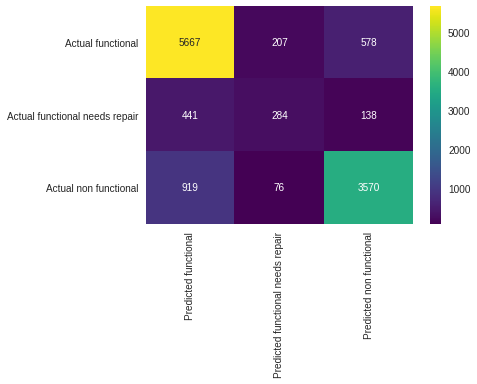

In [60]:
model_selection(X_train_subset, y_train, X_val_subset, y_val, estimator)

In [0]:
sumbission_sample_file = 'sample_submission.csv'
sample_submission = pd.read_csv(sumbission_sample_file)

In [0]:
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('kel-submission-06.csv', index=False)

In [0]:
!head kel-submission-06.csv

id,status_group
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [0]:
from google.colab import files
files.download('kel-submission-06.csv')